# Stratified Random Sampling - European Parties - European Committee of the Regions - Policy Incubator Project 2020

## *London School of Economics and Political Science*


### *European Institute*

#### Authors:
- Tim Jacobs
- Hande Taner
- Nicole Lawler
- Christian Zörner



**Disclaimer:**

This online appendix is part of a research project in cooperation with the *European Committee of the Regions*. Any views expressed in this research do not necessarily reflect those of the European Committee of the Regions. While writing this research, no author declared to have conflict of interest with the European Committee of the Regions nor any other organisation. We are grateful for the constructive comments of our project-supervisor Dr Miriam Sorace, but would like to emphasize that any error is the sole responsibility of the authors.

## Introduction

To obtain a representative sample with which the research question, as outlined in the project, can be explored, it was chosen to randomly sample 35 national but in the European Parliament represented parties. The number of 35 captures 21% of the population. This sample was obtained by means of the code as outlined in this appendix. Due to the limited size of the sample, it was chosen to make use of stratification based on European Party Group affiliation. One could argue that other factors such as for instance country affiliation and number of seats should be taken into account too. Yet, due to the limited sample size, balance across these variables will only be verified after randomization. In case of the obtained sample being unbalanced, in terms of non-controled variables, the sampling procedure cou be repeated. 

#### Data:

**Manifestoes European Party Groups:**
[EPP](https://www.epp.eu/files/uploads/2019/04/EPP-MANIFESTO-2019.pdf)/
[S&D](https://www.pes.eu/export/sites/default/.galleries/Documents-gallery/PES-Manifesto-2019_EN.pdf_2063069299.pdf)/
[Greens](https://europeangreens.eu/sites/europeangreens.eu/files/8.%20PROOFREAD%20Adopted%20%20EGP%20Manifesto%202019.pdf)/
[ALDE](https://www.aldeparty.eu/sites/alde/files/40-Resolutions/2019_freedom_opportunity_prosperity_the_liberal_vision_for_the_future_of_europe_0.pdf )

**2019 European Parliament Election Results:**
[Here](https://www.europarl.europa.eu/election-results-2019/en ) (accessed February 22, 2020)

Although the project’s dataset could have been constructed with a dataframe or a nested dictionary, it was chosen to construct two separate dictionaries over the course of the notebook. This makes the notebook substantially longer but the computations easier to grasp for the less experienced reader. Similar logic applies to the for-loops presented in the notebook.

In [1]:
import random
import matplotlib.pyplot as plt

## Constructing the Simple Algorithm

#### The dictionary "population":
The dictionary "population" contains all parties represented in the European Parliament and their corresponding party group. The data is based on the composition of the European Parliament in the year [2019](https://www.europarl.europa.eu/election-results-2019/en ) and will form the main basis for the randomisation process. 

To define the abbreviations:
- EPP - *Group of the European People's Party (Christian Democrats)*
- S&D - *Group of the Progressive Alliance of Socialists and Democrats in the European Parliament*
- ECR - *European Conservatives and Reformists Group*
- Renew Europe - *Renew Europe group*
- GUE/NGL - *Confederal Group of the European United Left - Nordic Green Left*
- Greens/EFA - *Group of the Greens/European Free Alliance*
- ID - *Identity and Democracy*
- NI - *Non-attached Members*

In [2]:
population = {
    "Christlich Demokratische Union Deutschlands":"EPP",
    "Die Grünen":"Greens/EFA",
    "Sozialdemokratische Partei Deutschlands":"SD",
    "Alternative für Deutschland":"ID",
    "Die Linke":"GUE/NGL",
    "Freie Demokratische Partei":"Renew Europe",
    "Freie Wähler":"Renew Europe",
    "PARTEI MENSCH UMWELT TIERSCHUTZ":"GUE/NGL",
    "Ökologisch-Demokratische Partei":"Greens/EFA",
    "Piratenpartei Deutschland":"Greens/EFA",
    "Familien-Partei Deutschlands":"ECR",
    "VOLT":"Greens/EFA",
    "Partei für Arbeit, Rechtsstaat, Tierschutz, Elitenförderung und basisdemokratische Initiative":"Greens/EFA",
    "Partei für Arbeit, Rechtsstaat, Tierschutz, Elitenförderung und basisdemokratische Initiative2":"NI",
    "Rassemblement national":"ID",
    "Coalition Renaissance":"Renew Europe",
    "Europe écologie-Les verts":"Greens/EFA",
    "Les Républicains":"EPP",
    "France insoumise":"GUE/NGL",
    "Coalition Envie d'Europe écologique et sociale":"SD",
    "Lega Salvini Premier":"ID",
    "Partito Democratico":"SD",
    "Movimento Cinque Stelle":"NI",
    "Forza Italia":"EPP",
    "Fratelli d'Itali":"ECR",
    "Südtiroler Volkspartei":"EPP",
    "Partido Socialista Obrero Español + Partido de los Socialistas de Cataluña":"SD",
    "Partido Popular":"EPP",
    "Ciudadanos - Partido de la Ciudadanía":"Renew Europe",
    "Coalition Unidas Podemos Cambiar Europa (UP + IU + Catalunya en Comú + Barcelona en Comú)":"GUE/NGL",
    "Coalition Unidas Podemos Cambiar Europa (UP + IU + Catalunya en Comú + Barcelona en Comú)2":"Greens/EFA",
    "VOX ":"ECR",
    "Coalition Ahora Repúblicas (ERC + Bildu + BNG)":"GUE/NGL",
    "Coalition Ahora Repúblicas (ERC + Bildu + BNG)2":"Greens/EFA",
    "Coalition Ahora Repúblicas (ERC + Bildu + BNG)3":"NI",
    "Coal LLIURES PER EUROPA (JUNTS) (PdCat + JXCat)":"NI",
    "Coalition por una Europa Solidaria (EAJ-PNV + CC + CxG + Atarrabia Taldea + El Pi + Valencians)":"Renew Europe",
    "Prawo i Sprawiedliwoś":"ECR",
    "Coalition Koalicja Europejska (PO + PSL + SLD + .N + Z)":"EPP",
    "Coalition Koalicja Europejska (PO + PSL + SLD + .N + Z)2":"SD",
    "Wiosna":"SD",
    "Partidul Naţional Liberal":"EPP",
    "Partidul Social Democrat":"SD",
    "Coalition 2020 USR + PLUS Alliance (USR+PLUS)":"Renew Europe",
    "Partidul Pro Romania":"SD",
    "Partidul Mișcarea Populară":"EPP",
    "Romániai Magyar Demokrata Szövetség/Uniunea Democrată Maghiară din România":"EPP",
    "Partij van de Arbeid":"SD",
    "Volkspartij voor Vrijheid en Democratie":"Renew Europe",
    "Christen-Democratisch Appèl":"EPP",
    "Forum voor Democratie":"ECR",
    "GroenLinks":"Greens/EFA",
    "Democraten 66":"Renew Europe",
    "Coalition ChristenUnie - Staatkundig Gereformeerde Partij":"EPP",
    "Coalition ChristenUnie - Staatkundig Gereformeerde Partij2":"ECR",
    "Partij voor de Dieren":"GUE/NGL",
    "50+":"EPP",
    "Nieuw-Vlaamse Alliantie":"ECR",
    "Vlaams Belang":"ID",
    "Parti Socialiste":"SD",
    "Open Vlaamse Liberalen en Democraten":"Renew Europe",
    "Christen-Democratisch & Vlaams":"EPP",
    "Ecologistes Confédérés pour l'Organisation de Luttes Originales":"Greens/EFA",
    "Mouvement Réformateur":"Renew Europe",
    "Groen":"Greens/EFA",
    "Socialistische Partij - Anders":"SD",
    "Parti du Travail de Belgique":"GUE/NGL",
    "Centre Démocrate Humaniste":"EPP",
    "Christlich Soziale Partei":"EPP",
    "New Democracy":"EPP",
    "Coalition of the Radical Left":"GUE/NGL",
    "Movement for Change (ΠΑΣΟΚ + ΔΗΣΥ + ΚΙΔΗΣΟ / PASOK + DISI + KIDISO) ":"EPP",
    "Communist Party of Greece":"NI",
    "Golden Dawn":"NI",
    "Greek Solution":"ECR",
    "ANO 2011":"Renew Europe",
    "Občanská demokratická strana":"ECR",
    "Česká pirátská strana":"Greens/EFA",
    "STAROSTOVÉ (STAN) s regionálními partnery a TOP 09":"EPP",
    "Svoboda a přímá demokracie":"ID",
    "Křesťanská a demokratická unie – Československá strana lidová":"EPP",
    "Komunistická strana Čech a Moravy":"GUE/NGL",
    "Partido Socialista":"SD",
    "Partido Social Democrata":"EPP",
    "Bloco de Esquerda":"GUE/NGL",
    "Coligação Democrática Unitária (PCP + PEV)":"GUE/NGL",
    "CDS - Partido Popular":"EPP",
    "Pessoas–Animais–Natureza":"Greens/EFA",
    "Socialdemokraterna":"SD",
    "Moderaterna":"EPP",
    "Sverigedemokraterna":"ECR",
    "Miljöpartiet de Gröna":"Greens/EFA",
    "Centerpartiet":"Renew Europe",
    "Kristdemokraterna":"EPP",
    "Vänsterpartiet":"GUE/NGL",
    "Liberalerna":"Renew Europe",
    "Coalition (FIDESZ + KDNP)":"EPP",
    "Demokratikus Koalíció":"SD",
    "Momentum Mozgalom":"Renew Europe",
    "Coalition (MSZP + Párbeszéd)":"SD",
    "Jobbik Magyarországért Mozgalom":"NI",
    "Österreichische Volkspartei":"EPP",
    "Sozialdemokratische Partei Österreich":"SD",
    "Freiheitliche Partei Österreichs":"ID",
    "Die Grünen - Die Grüne Alternative":"Greens/EFA",
    "NEOS - Das neue Österreich":"Renew Europe",
    "Coalition (GERB/ГЕРБ":"EPP",
    "Bulgarska sotsialisticheska partiya":"SD",
    "Dvizhenie za prava i svobodi":"Renew Europe",
    "VMRO - Bulgarsko Natsionalno Dvizhenie":"ECR",
    "Demokratichna Bulgaria ":"EPP",
    "Venstre, Danmarks Liberale Parti":"Renew Europe",
    "Socialdemokratiet":"SD",
    "Socialistisk Folkeparti":"Greens/EFA",
    "Det Radikale Venstre":"Renew Europe",
    "Dansk Folkeparti":"ID",
    "Det Konservative Folkeparti":"EPP",
    "Enhedslisten, de Rød-Grønne":"GUE/NGL",
    "Kansallinen Kokoomus":"EPP",
    "Vihreä liitto":"Greens/EFA",
    "Suomen Sosialidemokraattinen Puolue/Finlands Socialdemokratiska Parti":"SD",
    "Perussuomalaiset":"ID",
    "Suomen Keskusta":"Renew Europe",
    "Vasemmistoliitto":"GUE/NGL",
    "Svenska folkpartiet (Ruotsalainen kansanpuolue)":"Renew Europe",
    "Coalition (PS + SPOLU)":"EPP",
    "Coalition (PS + SPOLU)2":"Renew Europe",
    "SMER - Sociálna demokracia":"SD",
    "Kotleba - Ľudová strana Naše Slovensko":"NI",
    "Sloboda a Solidarita":"ECR",
    "Kresťanskodemokratické hnutie":"EPP",
    "Coalition (OL'aNO + NOVA)":"EPP",
    "Fine Gael Party":"EPP",
    "Green Party":"Greens/EFA",
    "Independents 4 Change":"GUE/NGL",
    "Fianna Fáil Party":"Renew Europe",
    "Sinn Féin":"GUE/NGL",
    "Independents":"GUE/NGL",
    "Hrvatska demokratska zajednica":"EPP",
    "Socijaldemokratska partija Hrvatske":"SD",
    "Coalition Hrvatski suverenisti":"ECR",
    "Independent Mislav Kolakušić":"NI",
    "Živi zid":"NI",
    "Coalition Amsterdamska koalicija (HL + PGS + HSU + IDS + HSS + GLAS + Demokrati)":"Renew Europe",
    "Tėvynės sąjunga - Lietuvos krikščionys demokratai":"EPP",
    "Lietuvos socialdemokratų partija":"SD",
    "Lietuvos Valstiečių ir Žaliųjų Sąjunga":"Greens/EFA",
    "Darbo partija":"Renew Europe",
    "Lietuvos Respublikos liberalų sąjūdis":"Renew Europe",
    "Visuomeninis rinkimų komitetas Aušros Maldeikienės traukinys":"EPP",
    "Lietuvos lenkų rinkimų akcija - krikščioniškų šeimų sąjunga":"ECR",
    "Coalition (SDS + SLS)":"EPP",
    "Socialni demokrati":"SD",
    "Lista Marjana Šarca":"Renew Europe",
    "Nova Slovenija":"EPP",
    "Jaunā Vienotība":"EPP",
    "Saskaņa Sociāldemokrātiskā partija":"SD",
    "Coalition Nacionālā apvienība (TB/LNNK+VL!)":"ECR",
    "Coalition AP! (Latvijas attīstībai + Par!)":"Renew Europe",
    "Latvijas Krievu savienībā":"EFA",
    "Eesti Reformierakond":"Renew Europe",
    "Sotsiaaldemokraatlik Erakond":"SD",
    "Eesti Keskerakond":"Renew Europe",
    "Eesti Konservatiivne Rahvaerakond":"ID",
    "Demokratesch Partei/Parti démocratique":"Renew Europe",
    "Chrëschtlech-Sozial Vollekspartei/Parti populaire chrétien-social":"EPP",
    "Déi Gréng/Les Verts":"Greens/EFA",
    "Lëtzebuerger Sozialistesch Aarbechterpartei/Parti ouvrier socialiste luxembourgeois":"SD",
    "Partit Laburista/Malta Labour Party":"SD",
    "Partit Nazzjonalista/Nationalist Party":"EPP"
}

#### A Closer look at the Distribution of Seats:
The dictionary "seats" contains all parties represented in the European Parliament and their number of seats. The dataset is based on the composition of the European Parliament in the year [2019](https://www.europarl.europa.eu/election-results-2019/en ). This data is used later to verify the balance of our obtained sample. 

A similar dictionary could be constructed for the parties and the countries they stem from, but is not done is this notebook. However, balance across the latter variable will be checked at the end of this notebook.

In [3]:
seats = {
    "Christlich Demokratische Union Deutschlands":29,
    "Die Grünen":21,
    "Sozialdemokratische Partei Deutschlands":16,
    "Alternative für Deutschland":11,
    "Die Linke":5,
    "Freie Demokratische Partei":5,
    "Freie Wähler":2,
    "PARTEI MENSCH UMWELT TIERSCHUTZ":1,
    "Ökologisch-Demokratische Partei":1,
    "Piratenpartei Deutschland":1,
    "Familien-Partei Deutschlands":1,
    "VOLT":1,
    "Partei für Arbeit, Rechtsstaat, Tierschutz, Elitenförderung und basisdemokratische Initiative":2,
    "Rassemblement national":22,
    "Coalition Renaissance":21,
    "Europe écologie-Les verts":12,
    "Les Républicains":8,
    "France insoumise":6,
    "Coalition Envie d'Europe écologique et sociale":5,
    "Lega Salvini Premier":28,
    "Partito Democratico":19,
    "Movimento Cinque Stelle":14,
    "Forza Italia":6,
    "Fratelli d'Itali":5,
    "Südtiroler Volkspartei":1,
    "Partido Socialista Obrero Español + Partido de los Socialistas de Cataluña":20,
    "Partido Popular":12,
    "Ciudadanos - Partido de la Ciudadanía":7,
    "Coalition Unidas Podemos Cambiar Europa (UP + IU + Catalunya en Comú + Barcelona en Comú)":5,
    "Coalition Unidas Podemos Cambiar Europa (UP + IU + Catalunya en Comú + Barcelona en Comú)2":1,
    "VOX ":3,
    "Coalition Ahora Repúblicas (ERC + Bildu + BNG)":1,
    "Coalition Ahora Repúblicas (ERC + Bildu + BNG)2":1,
    "Coalition Ahora Repúblicas (ERC + Bildu + BNG)3":1,
    "Coal LLIURES PER EUROPA (JUNTS) (PdCat + JXCat)":2,
    "Coalition por una Europa Solidaria (EAJ-PNV + CC + CxG + Atarrabia Taldea + El Pi + Demòcrates Valencians)":1,
    "Prawo i Sprawiedliwoś":26,
    "Coalition Koalicja Europejska (PO + PSL + SLD + .N + Z)":17,
    "Coalition Koalicja Europejska (PO + PSL + SLD + .N + Z)2":5,
    "Wiosna":3,
    "Partidul Naţional Liberal":10,
    "Partidul Social Democrat":8,
    "Coalition 2020 USR + PLUS Alliance (USR+PLUS)":8,
    "Partidul Pro Romania":2,
    "Partidul Mișcarea Populară":2,
    "Romániai Magyar Demokrata Szövetség/Uniunea Democrată Maghiară din România":2,
    "Partij van de Arbeid":6,
    "Volkspartij voor Vrijheid en Democratie":4,
    "Christen-Democratisch Appèl":4,
    "Forum voor Democratie":3,
    "GroenLinks":3,
    "Democraten 66":2,
    "Coalition ChristenUnie - Staatkundig Gereformeerde Partij":1,
    "Coalition ChristenUnie - Staatkundig Gereformeerde Partij2":1,
    "Partij voor de Dieren":1,
    "50+":1,
    "Nieuw-Vlaamse Alliantie":3,
    "Vlaams Belang":3,
    "Parti Socialiste":2,
    "Open Vlaamse Liberalen en Democraten":2,
    "Christen-Democratisch & Vlaams":2,
    "Ecologistes Confédérés pour l'Organisation de Luttes Originales":2,
    "Mouvement Réformateur":2,
    "Groen":1,
    "Socialistische Partij - Anders":1,
    "Parti du Travail de Belgique":1,
    "Centre Démocrate Humaniste":1,
    "Christlich Soziale Partei":1,
    "New Democracy":8,
    "Coalition of the Radical Left":6,
    "Movement for Change (ΠΑΣΟΚ + ΔΗΣΥ + ΚΙΔΗΣΟ / PASOK + DISI + KIDISO) ":2,
    "Communist Party of Greece":2,
    "Golden Dawn":2,
    "Greek Solution":1,
    "ANO 2011":6,
    "Občanská demokratická strana":4,
    "Česká pirátská strana":3,
    "STAROSTOVÉ (STAN) s regionálními partnery a TOP 09":3,
    "Svoboda a přímá demokracie":2,
    "Křesťanská a demokratická unie – Československá strana lidová":2,
    "Komunistická strana Čech a Moravy":1,
    "Partido Socialista":9,
    "Partido Social Democrata":6,
    "Bloco de Esquerda":2,
    "Coligação Democrática Unitária (PCP + PEV)":2,
    "CDS - Partido Popular":1,
    "Pessoas–Animais–Natureza":1,
    "Socialdemokraterna":5,
    "Moderaterna":4,
    "Sverigedemokraterna":3,
    "Miljöpartiet de Gröna":2,
    "Centerpartiet":2,
    "Kristdemokraterna":2,
    "Vänsterpartiet":1,
    "Liberalerna":1,
    "Coalition (FIDESZ + KDNP)":13,
    "Demokratikus Koalíció":4,
    "Momentum Mozgalom":2,
    "Coalition (MSZP + Párbeszéd)":1,
    "Jobbik Magyarországért Mozgalom":1,
    "Österreichische Volkspartei":7,
    "Sozialdemokratische Partei Österreich":5,
    "Freiheitliche Partei Österreichs":3,
    "Die Grünen - Die Grüne Alternative":2,
    "NEOS - Das neue Österreich":1,
    "Coalition (GERB/ГЕРБ":6,
    "Bulgarska sotsialisticheska partiya":5,
    "Dvizhenie za prava i svobodi":3,
    "VMRO - Bulgarsko Natsionalno Dvizhenie":2,
    "Demokratichna Bulgaria ":1,
    "Venstre, Danmarks Liberale Parti":3,
    "Socialdemokratiet":3,
    "Socialistisk Folkeparti":2,
    "Det Radikale Venstre":2,
    "Dansk Folkeparti":1,
    "Det Konservative Folkeparti":1,
    "Enhedslisten, de Rød-Grønne":1,
    "Kansallinen Kokoomus":3,
    "Vihreä liitto":2,
    "Suomen Sosialidemokraattinen Puolue/Finlands Socialdemokratiska Parti":2,
    "Perussuomalaiset":2,
    "Suomen Keskusta":2,
    "Vasemmistoliitto":1,
    "Svenska folkpartiet (Ruotsalainen kansanpuolue)":1,
    "Coalition (PS + SPOLU)":3,
    "Coalition (PS + SPOLU)2":1,
    "SMER - Sociálna demokracia":3,
    "Kotleba - Ľudová strana Naše Slovensko":2,
    "Sloboda a Solidarita":2,
    "Kresťanskodemokratické hnutie":1,
    "Coalition (OL'aNO + NOVA)":1,
    "Fine Gael Party":4,
    "Green Party":2,
    "Independents 4 Change":2,
    "Fianna Fáil Party":1,
    "Sinn Féin":1,
    "Independents":1,
    "Hrvatska demokratska zajednica":4,
    "Socijaldemokratska partija Hrvatske":3,
    "Coalition Hrvatski suverenisti":1,
    "Independent Mislav Kolakušić":1,
    "Živi zid":1,
    "Coalition Amsterdamska koalicija (HL + PGS + HSU + IDS + HSS + GLAS + Demokrati)":1,
    "Tėvynės sąjunga - Lietuvos krikščionys demokratai":3,
    "Lietuvos socialdemokratų partija":2,
    "Lietuvos Valstiečių ir Žaliųjų Sąjunga":2,
    "Darbo partija":1,
    "Lietuvos Respublikos liberalų sąjūdis":1,
    "Visuomeninis rinkimų komitetas Aušros Maldeikienės traukinys":1,
    "Lietuvos lenkų rinkimų akcija - krikščioniškų šeimų sąjunga":1,
    "Coalition (SDS + SLS)":3,
    "Socialni demokrati":2,
    "Lista Marjana Šarca":2,
    "Nova Slovenija":1,
    "Jaunā Vienotība":2,
    "Saskaņa Sociāldemokrātiskā partija":2,
    "Coalition Nacionālā apvienība (TB/LNNK+VL!)":2,
    "Coalition AP! (Latvijas attīstībai + Par!)":1,
    "Latvijas Krievu savienībā":1,
    "Eesti Reformierakond":2,
    "Sotsiaaldemokraatlik Erakond":2,
    "Eesti Keskerakond":1,
    "Eesti Konservatiivne Rahvaerakond":1,
    "Demokratesch Partei/Parti démocratique":2,
    "Chrëschtlech-Sozial Vollekspartei/Parti populaire chrétien-social":2,
    "Déi Gréng/Les Verts":1,
    "Lëtzebuerger Sozialistesch Aarbechterpartei/Parti ouvrier socialiste luxembourgeois":1,
    "Partit Laburista/Malta Labour Party":4,
    "Partit Nazzjonalista/Nationalist Party":2
}

The following code reveals that the distribution of seats across the national parties represented in the European Parliament is strongly skewed. Moreover, the dataset contains 169 parties, this number is slightly different from the initial election results, according to which there are [163](https://www.europarl.europa.eu/election-results-2019/en) unique national parties represented in the European Parliament. The difference is due to some MEPs switching party groups over the course of the term. A final important feature this data reveals, is that stratification based on the *number* of parties each Party Group comprises is not expected to result in major biases. This is further confirmed by creating the top-10 ranking of parties based on the number of seats they hold:

    - 1. Christlich Demokratische Union Deutschlands (EPP), seats:29
    - 2. Lega Salvini Premier (ID), seats:28
    - 3. Prawo i Sprawiedliwoś (ECR), seats:26
    - 4. Rassemblement national (ID), seats:22
    - 5. Die Grünen (Greens/EFA), seats:21
    - 6. Coalition Renaissance (Renew Europe), seats:21
    - 7. Partido Socialista Obrero Español + Partido de los Socialistas de Cataluña (SD), seats:20
    - 8. Partito Democratico (SD), seats:19
    - 9. Coalition Koalicja Europejska (PO + PSL + SLD + .N + Z) (EPP), seats:17
    - 10. Sozialdemokratische Partei Deutschlands (SD), seats:16

<a id='section_id'></a>

(Sorted-)distribution of seats: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 9, 10, 11, 12, 12, 13, 14, 16, 17, 19, 20, 21, 21, 22, 26, 28, 29]
Number of parties represented in the European Parliament: 169


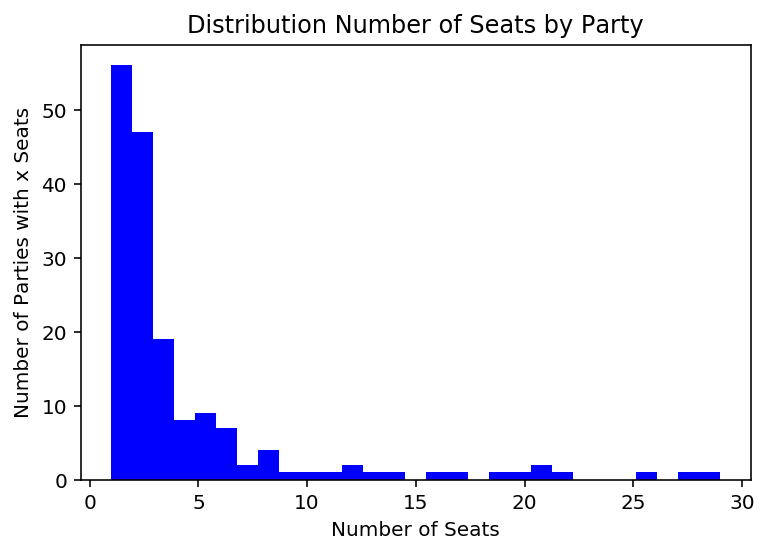

In [4]:
seats_2 = []

for x in seats.values():
    seats_2.append(x)
    
print("(Sorted-)distribution of seats:", sorted(seats_2))
print("Number of parties represented in the European Parliament:", len(seats_2))

plt.hist(seats_2, color="b", bins=29)
plt.xlabel("Number of Seats")
plt.ylabel("Number of Parties with x Seats")
plt.title("Distribution Number of Seats by Party")
plt.show()

#### Sorting the population of parties into subsamples based on European Parliament Group affiliation:

In [5]:
EPP_parties = []
SD_parties = []
ECR_parties = []
Renew_Europe_parties = []
GUE_NGL_parties = []
Greens_EFA_parties = []
ID_parties = []
NI_parties = []

In [6]:
for x,j in population.items():
    if j == "EPP":
        EPP_parties.append(x)

In [7]:
for x,j in population.items():
    if j == "SD":
        SD_parties.append(x)

In [8]:
for x,j in population.items():
    if j == "ECR":
        ECR_parties.append(x)

In [9]:
for x,j in population.items():
    if j == "Renew Europe":
        Renew_Europe_parties.append(x)

In [10]:
for x,j in population.items():
    if j == "GUE/NGL":
        GUE_NGL_parties.append(x)

In [11]:
for x,j in population.items():
    if j == "Greens/EFA":
        Greens_EFA_parties.append(x)

In [12]:
for x,j in population.items():
    if j == "ID":
        ID_parties.append(x)

In [13]:
for x,j in population.items():
    if j == "NI":
        NI_parties.append(x)

In [14]:
print("There are", len(EPP_parties), "parties affiliated to the EPP.")
print("There are", len(SD_parties), "parties affiliated to the S&D.")
print("There are", len(ECR_parties), "parties affiliated to the ECR")
print("There are", len(Renew_Europe_parties), "parties affiliated to Renew Europe.")
print("There are", len(GUE_NGL_parties), "parties affiliated to GUE/NGL.")
print("There are", len(Greens_EFA_parties), "parties affiliated to the Greens/EFA.")
print("There are", len(ID_parties), "parties affiliated to the ID.")
print("There are", len(NI_parties), "parties affiliated to the NI.")

print("There are", len(EPP_parties)+len(SD_parties)+len(ECR_parties)+len(Renew_Europe_parties)+len(GUE_NGL_parties)+len(Greens_EFA_parties)+len(ID_parties)+len(NI_parties), "parties in the dataset")

There are 41 parties affiliated to the EPP.
There are 27 parties affiliated to the S&D.
There are 15 parties affiliated to the ECR
There are 30 parties affiliated to Renew Europe.
There are 17 parties affiliated to GUE/NGL.
There are 20 parties affiliated to the Greens/EFA.
There are 9 parties affiliated to the ID.
There are 10 parties affiliated to the NI.
There are 169 parties in the dataset


#### Number-of-parties-to-seats ratio by party group:

The number of seats by party group could be easily computed with the data at hand. Yet, for the sake of the length of this appendix we copy-pasted the number from the [website](https://www.europarl.europa.eu/election-results-2019/en) of the European Parliament (*accessed February 22, 2020*).

In [15]:
def ratio_EPP(): 
    return round(len(EPP_parties) / 182,3)

def ratio_SD(): 
    return round(len(SD_parties) / 154,3)

def ratio_ECR(): 
    return round(len(ECR_parties) / 62,3)

def ratio_Renew_Europe(): 
    return round(len(Renew_Europe_parties) / 108,3)

def ratio_GUE_NGL(): 
    return round(len(GUE_NGL_parties) / 41,3)

def ratio_Greens_EFA(): 
    return round(len(Greens_EFA_parties) / 74,3)

def ratio_ID(): 
    return round(len(ID_parties) / 73,3)

def ratio_NI(): 
    return round(len(NI_parties) / 57,3)


print("Parties-to-seats ratio EPP:", ratio_EPP())
print("Parties-to-seats ratio S&D:", ratio_SD())
print("Parties-to-seats ratio ECR:", ratio_ECR())
print("Parties-to-seats ratio Renew Europe:", ratio_Renew_Europe())
print("Parties-to-seats ratio GUE/NGL:", ratio_GUE_NGL())
print("Parties-to-seats ratio Greens/EFA:", ratio_Greens_EFA())
print("Parties-to-seats ratio ID:", ratio_ID())
print("Parties-to-seats ratio NI:", ratio_NI())

Parties-to-seats ratio EPP: 0.225
Parties-to-seats ratio S&D: 0.175
Parties-to-seats ratio ECR: 0.242
Parties-to-seats ratio Renew Europe: 0.278
Parties-to-seats ratio GUE/NGL: 0.415
Parties-to-seats ratio Greens/EFA: 0.27
Parties-to-seats ratio ID: 0.123
Parties-to-seats ratio NI: 0.175


The above ratios indicate that there is substantial variation in the density of European Party Groups. This may indicate that it is less difficult for more dense groups, such as ID, to reach consensus among its members. It will prove interesting to check the party manifestos and voting patterns to explore this hypothesis. Moreover, the difference in density will be another factor we need to take into account when analysing the sample. A similar ratio could be constructed for parties-to-countries, to observe whether there is substantial variation in the number of parties stemming from each member state. The latter ratio is not computed in this notebook.

#### Determining the number of national parties to be sampled from each European Party Group: 

We decided to drop all non-attached members (NI) from the analysis, because it is deemed too unrealistic to treat these as a relatively homogeneous block.

In [16]:
def share_EPP():
    return round((len(EPP_parties) / (len(population)-len(NI_parties)) * 35),0)
print(share_EPP(), "parties from EPP should be sampled.")

def share_SD():
    return round((len(SD_parties) / (len(population)-len(NI_parties)) * 35),0)
print(share_SD(), "parties from SD should be sampled.")

def share_ECR():
    return round((len(ECR_parties) / (len(population)-len(NI_parties)) * 35),0)
print(share_ECR(), "parties from ECR should be sampled.")

def share_Renew_Europe():
    return round((len(Renew_Europe_parties) / (len(population)-len(NI_parties)) * 35),0)
print(share_Renew_Europe(), "parties from Renew Europe should be sampled.")

def share_GUE_NGL():
    return round((len(GUE_NGL_parties) / (len(population)-len(NI_parties)) * 35),0)
print(share_GUE_NGL(), "parties from GUE/NGL should be sampled.")

def share_Greens_EFA():
    return round((len(Greens_EFA_parties) / (len(population)-len(NI_parties)) * 35),0)
print(share_Greens_EFA(), "parties from Greens/EFA should be sampled.")

def share_ID():
    return round((len(ID_parties) / (len(population)-len(NI_parties)) * 35),0)
print(share_ID(), "parties from ID should be sampled.")

def total():
    return share_EPP()+share_SD()+share_ECR()+share_Renew_Europe()+share_GUE_NGL()+share_Greens_EFA()+share_ID()
print("Sample size is", total())

9.0 parties from EPP should be sampled.
6.0 parties from SD should be sampled.
3.0 parties from ECR should be sampled.
7.0 parties from Renew Europe should be sampled.
4.0 parties from GUE/NGL should be sampled.
4.0 parties from Greens/EFA should be sampled.
2.0 parties from ID should be sampled.
Sample size is 35.0


Comparing the obtained stratified sample proportions to the proportions that would have resulted from stratification based on "the number of seats by party group in the European Parliament", yields the following outcome:

 | Party Group   | Parties           | Seats |
 | --------------|:-----------------:| -----:| 
 | EPP           | 9                 | 9     |
 | S&D           | 6                 | 8     |
 | ECR           | 3                 | 3     |
 | Renew Europe  | 7                 | 5     |     
 | GUE/NGL       | 4                 | 2     |
 | Greens/NGL    | 4                 | 4     |
 | ID            | 2                 | 4     |
 | Total         | 35                | 35    |

The table illustrates that for 3 out of 7 parties the number of parties sampled is the same. Yet, stratification based on the number of national parties a party group comprises, yields a more representative sample due to more dense groups receiving less weight and less dense groups receiving more weight in the sampling procedure.

#### Randomly selecting a proportional subsample form each European Party Group:

In [17]:
def subsample_EPP():
    return random.sample(EPP_parties, k=9)
print("EPP parties used for analysis:", subsample_EPP())

EPP parties used for analysis: ["Coalition (OL'aNO + NOVA)", 'Coalition Koalicja Europejska (PO + PSL + SLD + .N + Z)', 'Jaunā Vienotība', 'Partit Nazzjonalista/Nationalist Party', 'Visuomeninis rinkimų komitetas Aušros Maldeikienės traukinys', 'Hrvatska demokratska zajednica', 'Movement for Change (ΠΑΣΟΚ + ΔΗΣΥ + ΚΙΔΗΣΟ / PASOK + DISI + KIDISO) ', 'Christlich Demokratische Union Deutschlands', 'Coalition ChristenUnie - Staatkundig Gereformeerde Partij']


In [18]:
def subsample_SD():
    return random.sample(SD_parties, k=6)
print("S&D parties used for analysis:", subsample_SD())

S&D parties used for analysis: ['Saskaņa Sociāldemokrātiskā partija', 'Lietuvos socialdemokratų partija', 'Sozialdemokratische Partei Österreich', 'Socialdemokratiet', 'Socialdemokraterna', 'Partidul Social Democrat']


In [19]:
def subsample_ECR():
    return random.sample(ECR_parties, k=3)
print("ECR parties used for analysis:", subsample_ECR())

ECR parties used for analysis: ['VOX ', 'Coalition Nacionālā apvienība (TB/LNNK+VL!)', 'Nieuw-Vlaamse Alliantie']


In [20]:
def subsample_Renew_Europe():
    return random.sample(Renew_Europe_parties, k=7)
print("Renew Europe parties used for analysis:", subsample_Renew_Europe())

Renew Europe parties used for analysis: ['Suomen Keskusta', 'Open Vlaamse Liberalen en Democraten', 'Mouvement Réformateur', 'Coalition 2020 USR + PLUS Alliance (USR+PLUS)', 'Eesti Keskerakond', 'Lietuvos Respublikos liberalų sąjūdis', 'Coalition Renaissance']


In [21]:
def subsample_GUE_NGL():
    return random.sample(GUE_NGL_parties, k=4)
print("GUE/NGL parties used for analysis:", subsample_GUE_NGL())

GUE/NGL parties used for analysis: ['Partij voor de Dieren', 'Coligação Democrática Unitária (PCP + PEV)', 'Komunistická strana Čech a Moravy', 'Die Linke']


In [22]:
def subsample_Greens_EFA():
    return random.sample(Greens_EFA_parties, k=4)
print("Greens/EFA parties used for analysis:", subsample_Greens_EFA())

Greens/EFA parties used for analysis: ['Groen', 'Ökologisch-Demokratische Partei', 'Coalition Ahora Repúblicas (ERC + Bildu + BNG)2', 'Česká pirátská strana']


In [23]:
def subsample_ID():
    return random.sample(ID_parties, k=2)
print("ID parties used for analysis:", subsample_ID())

ID parties used for analysis: ['Perussuomalaiset', 'Vlaams Belang']


#### The stratified random sample to be used in the analysis:

In [24]:
def subsample():
    return subsample_EPP()+subsample_SD()+subsample_ECR()+subsample_Renew_Europe()+subsample_GUE_NGL()+subsample_Greens_EFA()+subsample_ID()
print("Stratified random sample to be used for the project's analysis:", subsample())

Stratified random sample to be used for the project's analysis: ['Centre Démocrate Humaniste', 'Forza Italia', 'Movement for Change (ΠΑΣΟΚ + ΔΗΣΥ + ΚΙΔΗΣΟ / PASOK + DISI + KIDISO) ', 'Coalition (GERB/ГЕРБ', 'Tėvynės sąjunga - Lietuvos krikščionys demokratai', 'Partidul Mișcarea Populară', 'New Democracy', 'Kristdemokraterna', 'Coalition (SDS + SLS)', 'Partidul Pro Romania', 'Socialistische Partij - Anders', 'Wiosna', 'Partido Socialista Obrero Español + Partido de los Socialistas de Cataluña', 'Partido Socialista', 'Coalition Koalicja Europejska (PO + PSL + SLD + .N + Z)2', 'Nieuw-Vlaamse Alliantie', 'Greek Solution', 'Lietuvos lenkų rinkimų akcija - krikščioniškų šeimų sąjunga', 'Lista Marjana Šarca', 'Fianna Fáil Party', 'Svenska folkpartiet (Ruotsalainen kansanpuolue)', 'Eesti Keskerakond', 'Ciudadanos - Partido de la Ciudadanía', 'Coalition AP! (Latvijas attīstībai + Par!)', 'Venstre, Danmarks Liberale Parti', 'Coalition Unidas Podemos Cambiar Europa (UP + IU + Catalunya en Comú + 

**Note:** The output of "subsample()" does not match the output of "subsample_EPP()", "subsample_SD()", "subsample_ECR()", etc., as displayed above. Therefore, the output of only "subsample()" should be considered for analysis.

## Balance Check

Although the obtained sample is fully random, some scepticism about the predictability of the random.sample() function reserved, it is questionable to what extent stratification based on party group yields a sufficiently representative sample in a small-N study. The final section therefore provides a general template which may prove helpful in veryfing balance of unaccounted background variables, such as party density, country of origin, number of seats, gender/age MEPs, etc. 

This table is constructed manually, but could have been constructed automatically by storing the required information in, for instance, a Panda data frame.

| Party   | Group | Seats | country |
| --------------:--------:---------: -----: 
|Centre Démocrate Humaniste | EPP | 1 | Belgium |
|Forza Italia | EPP | 6 | Italy |
|Movement for Change (ΠΑΣΟΚ + ΔΗΣΥ + ΚΙΔΗΣΟ / PASOK + DISI + KIDISO)| EPP |2| Greece|
|Coalition (GERB/ГЕРБ)| EPP | 6 | Bulgaria|
|Tėvynės sąjunga - Lietuvos krikščionys demokratai| EPP | 3 | Lithuania |
|Partidul Mișcarea Populară | EPP | 2 | Romania |
|New Democracy| EPP | 8 |Greece |
|Kristdemokraterna  |EPP| 2 | Sweden|
|Coalition (SDS + SLS)  |EPP  | 3  |Slovenia  |
|Partidul Pro Romania | S&D | 2 | Romania
|Socialistische Partij – Anders | S&D | 1 |Belgium  |
|Wiosna |S&D  |3  |Poland |
|Partido Socialista Obrero Español + Partido de los Socialistas de Cataluña | S&D |20 | Spain |
|Partido Socialista |S&D  |9  |Portugal |
|Coalition Koalicja Europejska (PO + PSL + SLD + .N + Z)2 |S&D  |5  | Poland|
|Nieuw-Vlaamse Alliantie| ECR |3  |Belgium  |
|Greek Solution |ECR  |1  |Greece |
|Lietuvos lenkų rinkimų akcija - krikščioniškų šeimų sąjunga  |ECR|1| Lithuania |
|Lista Marjana Šarca  | Renew Europe  | 2 |Slovenia |
|Fianna Fáil Party  |Renew Europe | 1 |Ireland  |
|Svenska folkpartiet (Ruotsalainen kansanpuolue)| Renew Europe  | 1 |Finnland |
|Eesti Keskerakond  |Renew Europe |1  |Estonia  |
|Ciudadanos - Partido de la Ciudadanía  | Renew Europe  | 7 |Spain  |
|Coalition AP! (Latvijas attīstībai + Par!) |Renew Europe | 1 |Latvia |
|Venstre, Danmarks Liberale Parti | Renew Europe  | 3 | Denmark |
|Coalition Unidas Podemos Cambiar Europa (UP + IU + Catalunya en Comú + Barcelona en Comú)| GUE/NGL |5| Spain |
|Parti du Travail de Belgique | GUE/NGL | 1 |Belgium  |
|Coligação Democrática Unitária (PCP + PEV) | GUE/NGL | 2 | Portugal  |
|Komunistická strana Čech a Moravy  | GUE/NGL |1| Czechia |
|Die Grünen | Greens/EFA  |21 | Germany |
|GroenLinks | Greens/EFA  | 3 | Netherlands |
|Česká pirátská strana| Greens/EFA  |3  |Czechia  |
|Partei für Arbeit, Rechtsstaat, Tierschutz, Elitenförderung und basisdemokratische Initiative| Greens/EFA|2|Germany|
|Svoboda a přímá demokracie |ID |2  |Czechia|
|Rassemblement national |ID | 22  |France |

The number of parties sampled from each political group is determined by the stratification strategy. The sample distribution of seats is plotted below and matches the distribution of the population statistic as [displayed](#section_id) earlier fairly well. Yet, the top-percentile largest parties, in terms of seats, are somewhat overrepresented while those with 10 to 20 seats are missing in the sample. Moreover, the sample comprises 20 different member states and no member state is represented more than four times in the sample (Belgium). It can therefore be concluded that the sampling procedure yielded a representative sample which can be used for the analysis of the research project. 

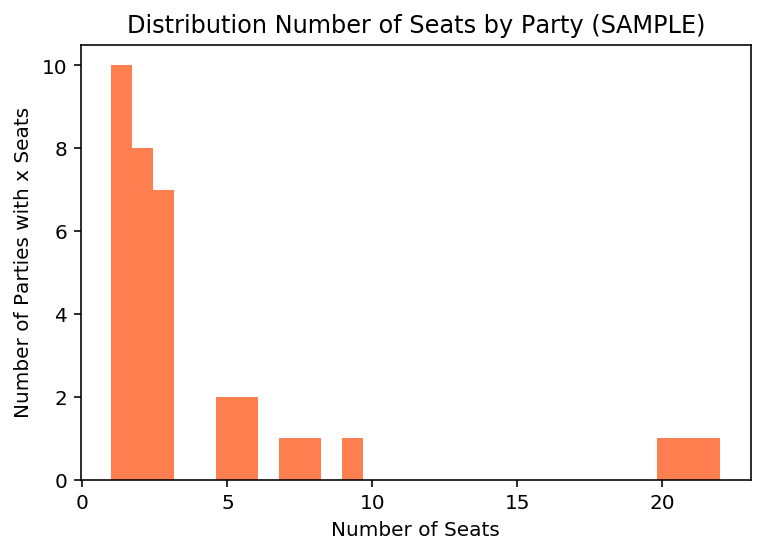

In [27]:
seats_table = [1,6,2,6,3,2,8,2,3,2,1,3,20,9,5,3,1,1,2,1,1,1,7,1,3,5,1,2,1,21,3,3,2,2,22]

plt.hist(seats_table, color="coral", bins=29)
plt.xlabel("Number of Seats")
plt.ylabel("Number of Parties with x Seats")
plt.title("Distribution Number of Seats by Party (SAMPLE)")
plt.show()